In [1]:
!pip install -q watermark
%load_ext watermark

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [3]:
%watermark -a 'Rhedson Esashika' --python

Author: Rhedson Esashika

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0



In [4]:
path_train_csv = 'train.csv'
df_train = pd.read_csv(path_train_csv)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Information

| Column         | Non-Null Count | Dtype   | Description (EN)                          | Descrição (PT-BR)                          |
|----------------|----------------|---------|-------------------------------------------|--------------------------------------------|
| PassengerId    | 891            | int64   | Unique identifier for each passenger      | Identificador único de cada passageiro     |
| Survived       | 891            | int64   | Survival status (0 = No, 1 = Yes)         | Estado de sobrevivência (0 = Não, 1 = Sim) |
| Pclass         | 891            | int64   | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)  | Classe do bilhete (1 = 1ª, 2 = 2ª, 3 = 3ª) |
| Name           | 891            | object  | Passenger's name                          | Nome do passageiro                         |
| Sex            | 891            | object  | Passenger's gender                        | Gênero do passageiro                       |
| Age            | 714            | float64 | Passenger's age                           | Idade do passageiro                        |
| SibSp          | 891            | int64   | Number of siblings/spouses aboard         | Número de irmãos/cônjuges a bordo          |
| Parch          | 891            | int64   | Number of parents/children aboard         | Número de pais/filhos a bordo              |
| Ticket         | 891            | object  | Ticket number                             | Número do bilhete                          |
| Fare           | 891            | float64 | Passenger fare                            | Tarifa do passageiro                       |
| Cabin          | 204            | object  | Cabin number                              | Número da cabine                           |
| Embarked       | 889            | object  | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) | Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton) |


In [5]:
print(f'Shape: {df_train.shape} - Size: {df_train.size}')

Shape: (891, 12) - Size: 10692


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Plot Data

In [7]:
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing

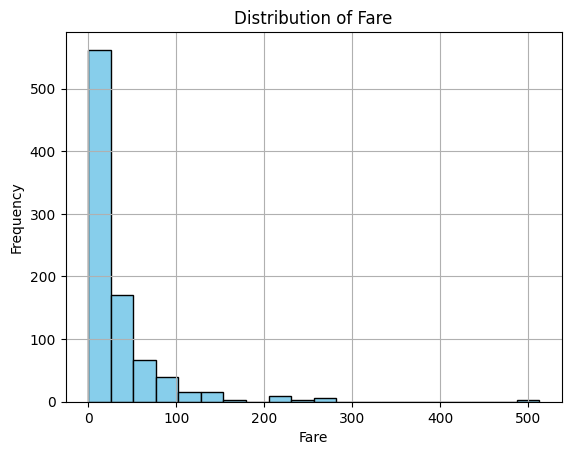

In [8]:
plt.hist(df_train['Fare'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Count')

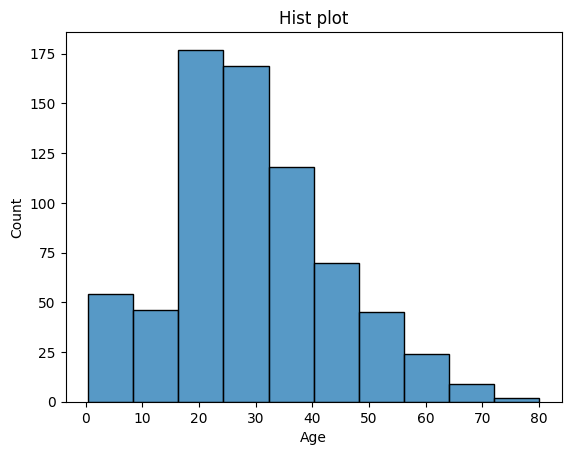

In [9]:
sns.histplot(df_train['Age'],bins=10)
plt.title('Hist plot')
plt.xlabel('Age')
plt.ylabel('Count')

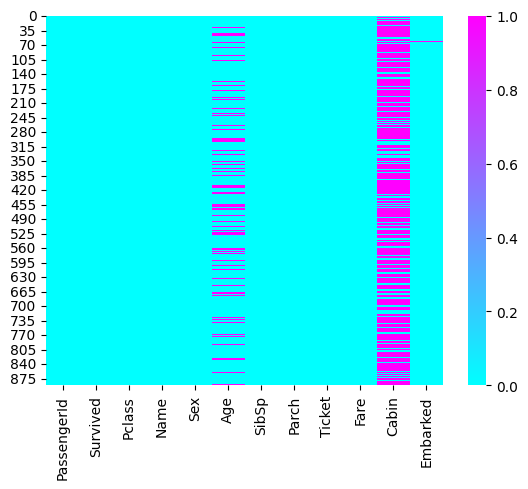

In [10]:
sns.heatmap(df_train.isnull(),cmap='cool');

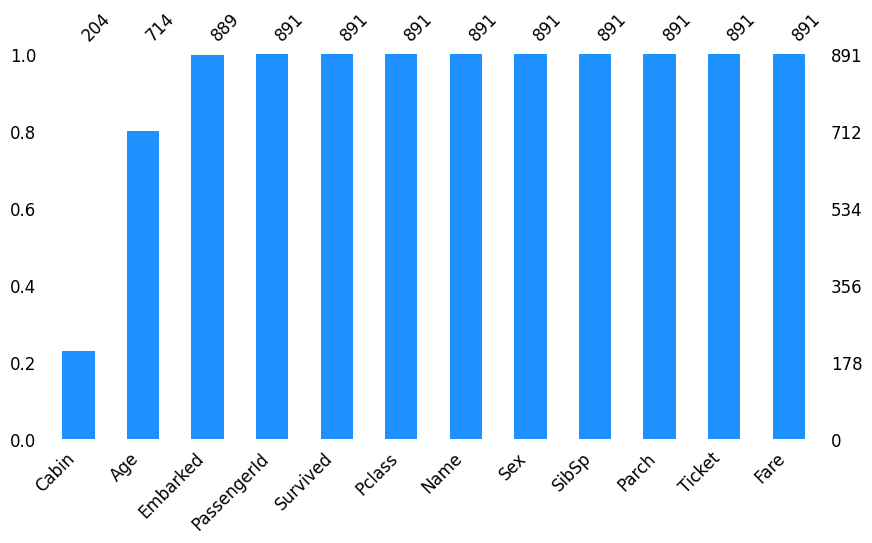

In [11]:
import missingno
missingno.bar(df_train, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Text(0.5, 1.0, 'Pairplot of Numerical Columns')

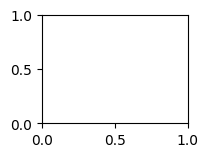

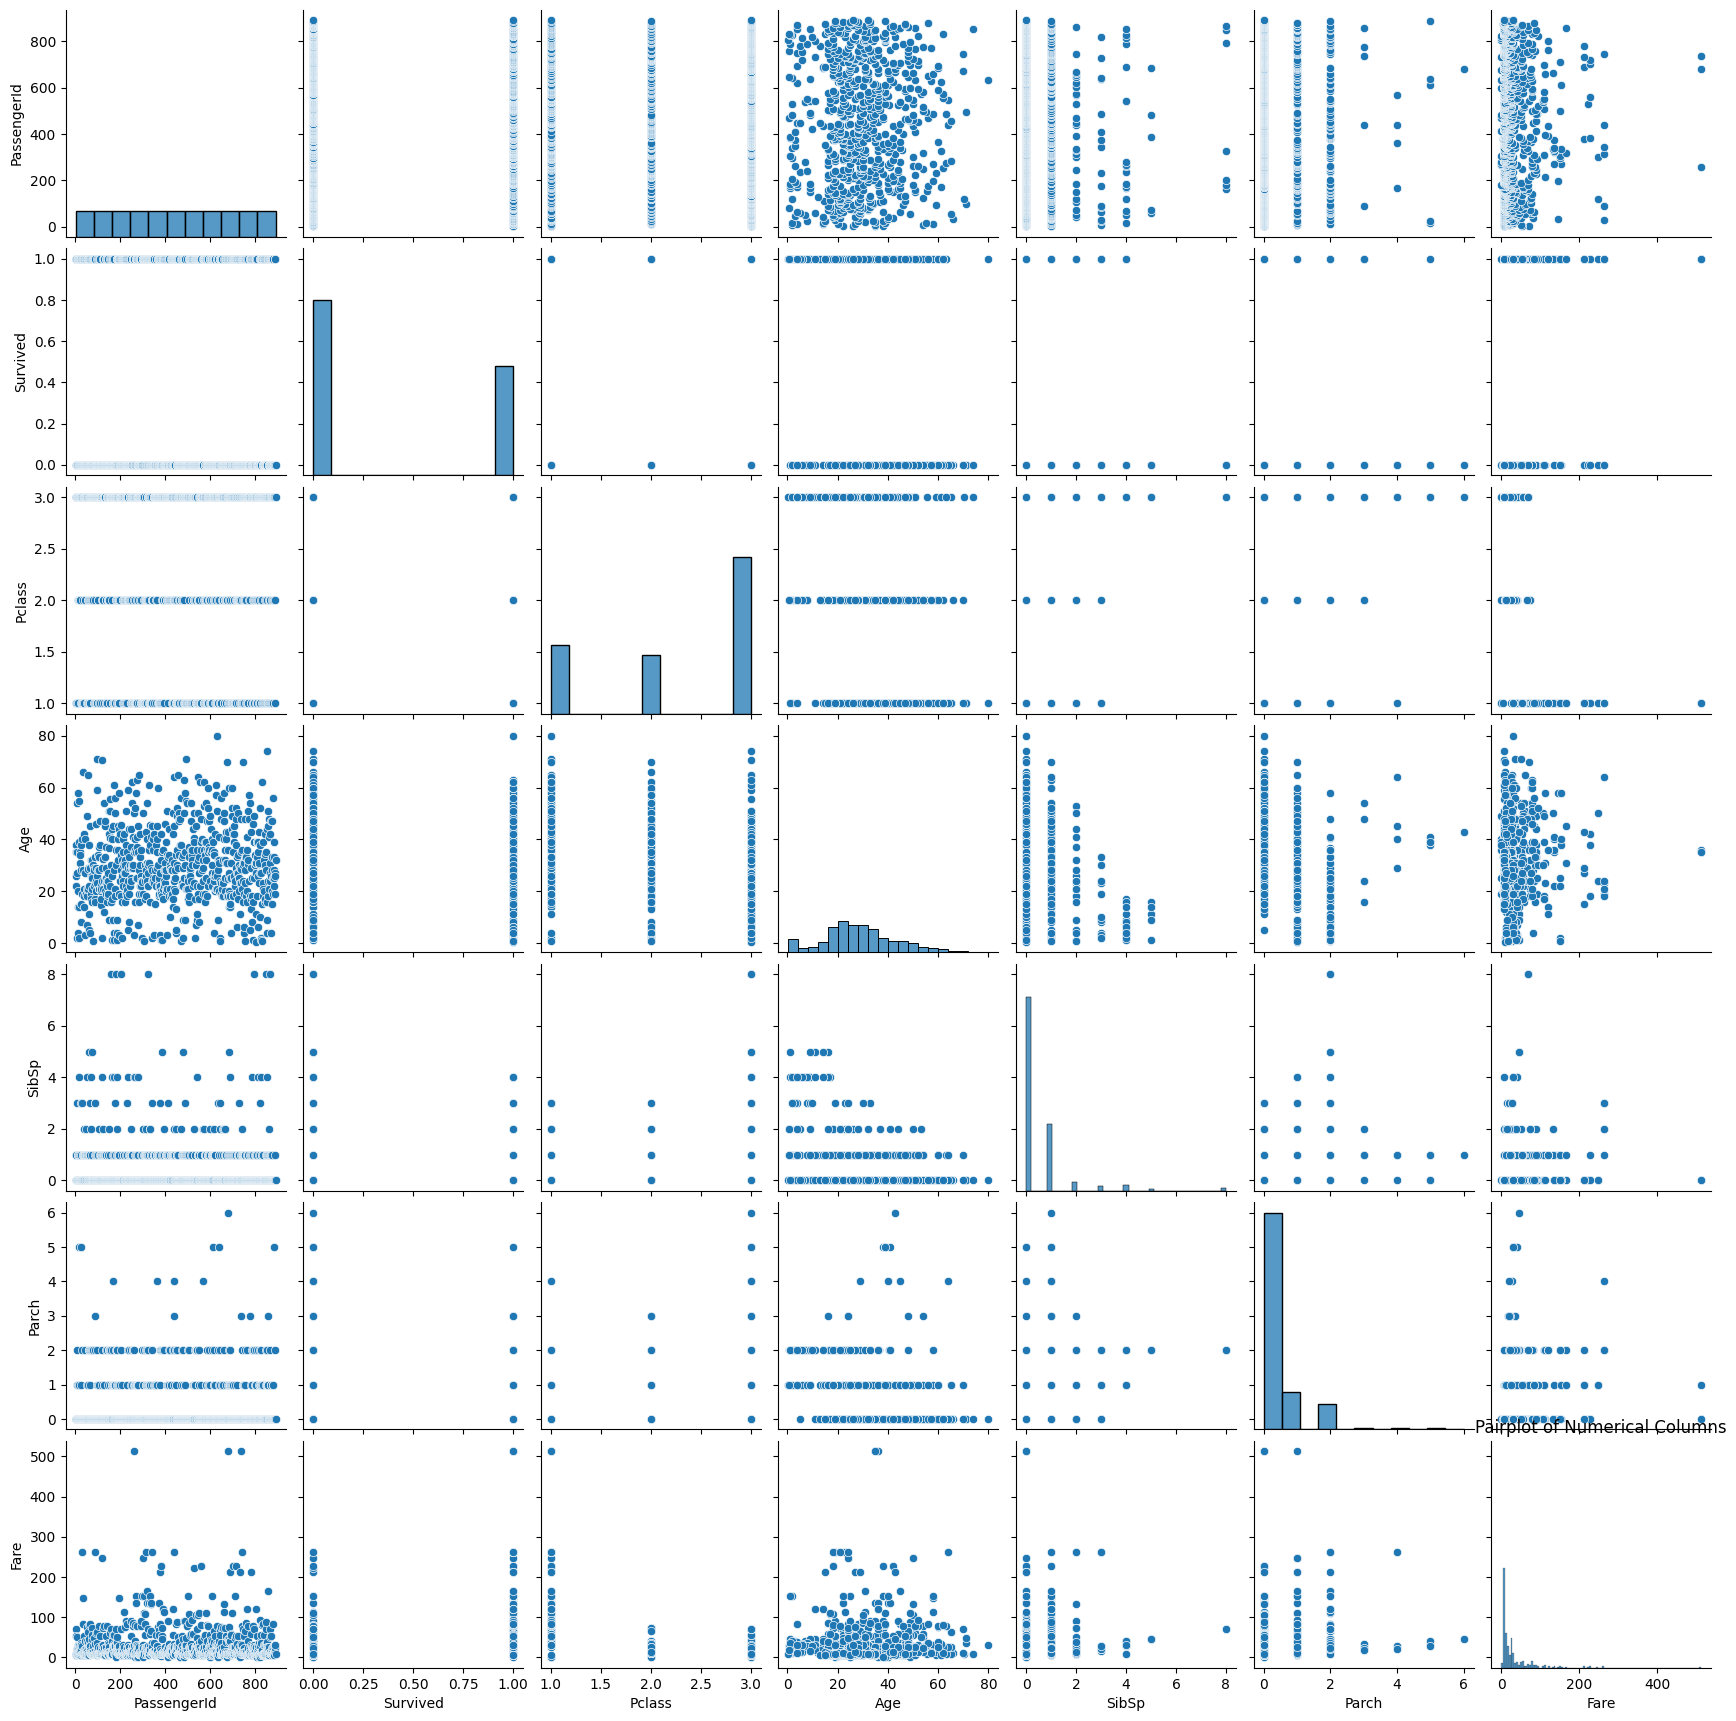

In [12]:
plt.subplot(3, 3, 4)
sns.pairplot(df_train)
plt.title('Pairplot of Numerical Columns')

## **Adjusting/removing** null values | **Ajustando/removendo** os valores nulos


### Age Column
* Replacing the missing values ​​in the 'Age' column with the average of the values ​​present in that same column.
*   Substituindo os valores ausentes na coluna 'Age' pela média dos valores presentes nessa mesma coluna.

In [13]:
#Células do campo idade com valores vazios, receberão a média da idade.
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

### Embarked Colum
* Fills in missing values ​​using the 'bfill' (*backward fill*) method, which fills in missing values ​​with the immediately following values ​​in the same column.
*   Preenche os valores ausentes usando o método 'bfill' (*backward fill*), que preenche os valores ausentes com os valores imediatamente seguintes na mesma coluna.

In [14]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
df_train['Embarked'] = df_train['Embarked'].fillna(method='bfill')

### Name, Ticket and Cabin Column
* The 'Name', 'Ticket' and 'Cabin' columns are deleted, in this author's interpretation, they are not relevant for model training.
*   As colunas 'Name', 'Ticket' e 'Cabin' são apagadas, pois, na interpretação deste autor não é relevante para o treinamento do modelo.

In [16]:
df_train = df_train.drop(['Name','Ticket', 'Cabin'],axis=1)

### Displaying the number of null values. | Exibindo a quantidade de valores nulos.

In [17]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Apply get_dummies


*   Transforms categorical values ​​into dummy variables. For each unique category in a column, it creates a new binary column (0 or 1) that indicates the presence or absence of that category for each entry in the DataFrame.
*   Transforma valores categóricos em variáveis dummy. Para cada categoria única em uma coluna, ela cria uma nova coluna binária (0 ou 1) que indica a presença ou ausência dessa categoria para cada entrada no DataFrame.



In [19]:
df_train = pd.get_dummies(df_train,columns=['Sex','Embarked'],drop_first=True)
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


## Train Test Split

In [20]:
X = df_train.drop(['Survived'],axis=1)
y = df_train['Survived']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

## Normalizing Data | Normalizando Dados

*   Standardizes (normalizes) training and testing data to ensure it has zero mean and unit standard deviation, which is useful for many machine learning algorithms.
*   Padroniza (normaliza) os dados de treinamento e teste para garantir que tenham média zero e desvio padrão unitário, o que é útil para muitos algoritmos de aprendizado de máquina.



In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Implementação dos Modelos

###LogisticRegression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [23]:
from sklearn.metrics import accuracy_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)

Training Accuracy    : 80.2
Model Accuracy Score : 79.89


### Support Vector Machines
https://scikit-learn.org/stable/modules/svm.html

In [24]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",svc_train)
print("Model Accuracy Score  :",svc_accuracy)

Training Accuracy     : 85.11
Model Accuracy Score  : 80.45


### KNeighborsClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",knn_train)
print("Model Accuracy Score  :",knn_accuracy)

Training Accuracy     : 90.03
Model Accuracy Score  : 75.98


### GaussianNB
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [26]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",gaussian_train)
print("Model Accuracy Score  :",gaussian_accuracy)

Training Accuracy     : 79.21
Model Accuracy Score  : 81.56


### Perceptron
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [27]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)


perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",perceptron_train)
print("Model Accuracy Score :",perceptron_accuracy)

Training Accuracy    : 73.17
Model Accuracy Score : 72.07


### LinearSVC
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [28]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",linear_svc_train)
print("Model Accuracy Score :",linear_svc_accuracy)

Training Accuracy    : 80.34
Model Accuracy Score : 81.01


### SGDClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [29]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",sgd_train)
print("Model Accuracy Score  :",sgd_accuracy)

Training Accuracy     : 73.6
Model Accuracy Score  : 73.18


### DecisionTreeClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [30]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
Y_pred = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",decision_train)
print("Model Accuracy Score  :",decision_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 70.95


### RandomForestClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train)
print("Model Accuracy Score  :",random_forest_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 79.89


### MLPClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [32]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
Y_pred = mlp.predict(X_test)
mlp.score(X_train, y_train)


mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",mlp_train)
print("Model Accuracy Score  :",mlp_accuracy)

Training Accuracy     : 86.52
Model Accuracy Score  : 79.33


### XGBClassifier
https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [33]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",xgb_train)
print("Model Accuracy Score  :",xgb_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 78.77


### Models Performance Comparing

In [34]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'KNN', 'Logistic Regression',
        'Random Forest',  'Perceptron',
        'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree',
        'GaussianNB', 'MLPClassifier', 'XGBClassifier'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy
    ]
})

In [35]:
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
7,Decision Tree,100.00,70.95
8,GaussianNB,100.00,79.89
10,XGBClassifier,100.00,78.77
2,Logistic Regression,90.03,75.98
9,MLPClassifier,86.52,79.33
1,KNN,85.11,80.45
5,Stochastic Gradient Decent,80.34,81.01
0,Support Vector Machines,80.20,79.89
3,Random Forest,79.21,81.56
6,Linear SVC,73.60,73.18


## Predict test

In [36]:
from sklearn.ensemble import RandomForestClassifier

y = df_train["Survived"]

features = ["Pclass", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_train[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)


output = pd.DataFrame({'PassengerId': df_train.PassengerId, 'Survived': predictions})

In [37]:
output

,PassengerId,Survived
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1
